In [6]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
%matplotlib inline
import numpy as np
import math

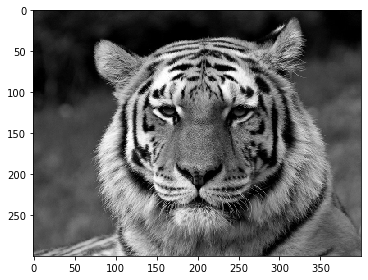

In [3]:
img = imread('tiger-gray-small.png')
imshow(img)

In [32]:
def gauss(x,y, sig):
    result = (1/(2 * math.pi * math.pow(sig, 2))) * math.pow(math.e, ((-x**2 - y**2)/(2 * sig**2)))
    return result
def get_kernel(sig):
    k = round(sig*6+1)
    box_size = k
    kernel = [[[i,j] for i in range(-(k//2), k//2+1)] for j in range(-(k//2), k//2+1)]
    S = 0
    summ = 0
    for i in range(len(kernel)):
        for j in range(len(kernel)):
            kernel[i][j] = gauss(kernel[i][j][0], kernel[i][j][1], sig)
            summ += kernel[i][j]
    for i in range(len(kernel)):
        for j in range(len(kernel)):
            kernel[i][j] = kernel[i][j]/summ
    return np.array(kernel)
def gauss_filter(img, kernel):
    if img.dtype != "float64":
        img_f = img_as_float(img)
    else:
        img_f = img
    box_size = kernel.shape[0]
    filtered_img = np.zeros((img.shape[0] - box_size + 1, img.shape[1] - box_size + 1))
    for x in range(filtered_img.shape[0]):
        for y in range(filtered_img.shape[1]):
            filtered_img[x][y] = sum(sum(img[x:x + box_size, y:y + box_size] * kernel))
    return filtered_img

[[3.75348309e-05 1.17473221e-03 3.70203354e-03 1.17473221e-03
  3.75348309e-05]
 [1.17473221e-03 3.67657383e-02 1.15862998e-01 3.67657383e-02
  1.17473221e-03]
 [3.70203354e-03 1.15862998e-01 3.65128922e-01 1.15862998e-01
  3.70203354e-03]
 [1.17473221e-03 3.67657383e-02 1.15862998e-01 3.67657383e-02
  1.17473221e-03]
 [3.75348309e-05 1.17473221e-03 3.70203354e-03 1.17473221e-03
  3.75348309e-05]]


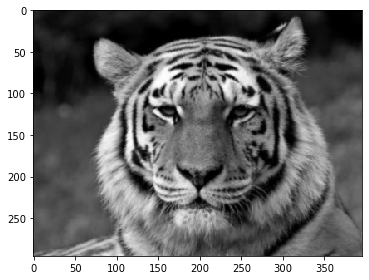

In [33]:
img_f = img_as_float(img)
kernel = get_kernel(0.66)
print(kernel)
filtered_img = gauss_filter(img_f, kernel)
filtered_img = np.floor(filtered_img * 255)
filtered_img = np.ndarray.astype(filtered_img, np.uint8)
imshow(filtered_img)

296 396


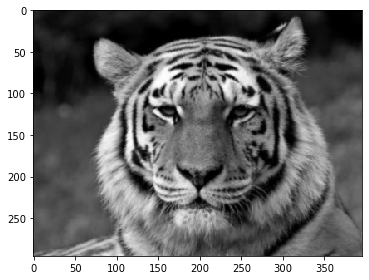

In [29]:
img1 = imread("gaussian-tiger.png")
print(img1.shape[0], img1.shape[1])
imshow(img1)

In [ ]:
[[3.65128922e-01 1.15862998e-01 3.70203354e-03 3.70203354e-03 1.15862998e-01]
 [1.15862998e-01 3.67657383e-02 1.17473221e-03 1.17473221e-03 3.67657383e-02]
 [3.70203354e-03 1.17473221e-03 3.75348309e-05 3.75348309e-05 1.17473221e-03]
 [3.70203354e-03 1.17473221e-03 3.75348309e-05 3.75348309e-05 1.17473221e-03]
 [1.15862998e-01 3.67657383e-02 1.17473221e-03 1.17473221e-03 3.67657383e-02]]

[[3.75348309e-05 1.17473221e-03 3.70203354e-03 1.17473221e-03 3.75348309e-05]
 [1.17473221e-03 3.67657383e-02 1.15862998e-01 3.67657383e-02 1.17473221e-03]
 [3.70203354e-03 1.15862998e-01 3.65128922e-01 1.15862998e-01 3.70203354e-03]
 [1.17473221e-03 3.67657383e-02 1.15862998e-01 3.67657383e-02 1.17473221e-03]
 [3.75348309e-05 1.17473221e-03 3.70203354e-03 1.17473221e-03 3.75348309e-05]]